# Define a typical scientific array

The definition of the matrix A is designed to represent a typical scientific data set that varies by orders of magnitude.  In addition, some of the data is invalid due to either no measurement ($A_{0,1} = 0$) or there was a measurement glitch ($A_{1,2} = -1$).

For sake of completeness, the entire matrix is given by: 

$$A = \left[ \begin{array}{ccc} 1\times 10^{-4} & 0 & 1\times 10^{-5} \\ 1\times 10^{-3} & 5\times 10^{-3} & -1 \end{array} \right]$$

In [16]:
A = np.array([[1e-4,0,1e-5],[1e-3,5e-3,-1]])
print A

[[  1.00000000e-04   0.00000000e+00   1.00000000e-05]
 [  1.00000000e-03   5.00000000e-03  -1.00000000e+00]]


A simple matrix plot (using matplotlib's pcolormesh) doesn't show anything useful since all the 'good' numbers are orders of magnitude smaller than the bad.  Note also that the matrix is 'plotted up' as the zeroth row corresponds to the lowest row of the plot

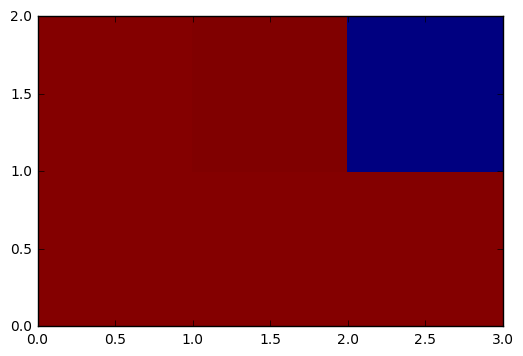

In [17]:
plt.pcolormesh(A)

Of course, the way to bring out the data is by taking a logarithm - but the inclusion of the '0' and the '-1' are going to cause problems.  Numpy gives two warnings (different ones) and it comes back with different values.  The resulting matrix should look like

$$ log_{10} (A) = \left[ \begin{array}{ccc} -4 & -\infty & -5 \\ -3 & -2.3 & nan \end{array} \right] $$

In [20]:
log_A = np.log10(A)
print log_A

[[-4.          -inf -5.     ]
 [-3.      -2.30103      nan]]


C:\Users\Conrad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
C:\Users\Conrad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


This helps a bit, but unfortunately the 'bad' values put in a false color that says something it shouldn't.

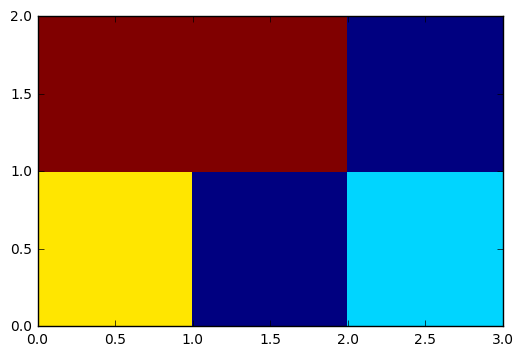

In [21]:
plt.pcolormesh(log_A,vmin=-6,vmax=-3)

A much better alternative is to mark the bad points as invalid.  Numpy's masked array does this for us.  The correct invoccation is numpy.ma.masked_invalid, where ma is numpy's masked array package and masked_invalid is the function that takes care of $-\infty$ and $nan$.  The proper array is now

$$ \log_{10}(A) = \left[ \begin{array}{ccc}  -4 & -- & -5 \\ -3 & -2.3 & --  \end{array} \right] $$

In [22]:
masked_log_A = np.ma.masked_invalid(log_A)
print masked_log_A

[[-4.0 -- -5.0]
 [-3.0 -2.3010299956639813 --]]


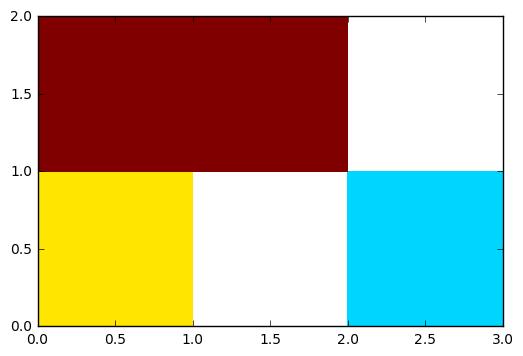

In [23]:
plt.pcolormesh(masked_log_A,vmin=-6,vmax=-3)